In [20]:
### Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import networkx as nx
import heapq
import time
from sklearn.cluster import KMeans
from utils_discrete import GraphConstructionDiscretization, Biobjective_search_and_heuristic_calc_class, extract_costs, check_pareto_optimality, plot_costs, reconstruct_solution_paths, plot_map_with_path, sample_representative_paths

In [21]:
# =============================================================================
# Constants, UAV parameters, and initial conditions
# =============================================================================
# Define QZ circles as tuples (x, y, radius, only_electric_radius, risk_limit, toggle_only_electric_or_no_path) toggle_only_electric_or_no_path = 0 for no path, 1 for only electric

# Map with two QZ circles
# map_qz = [(0.0, 0.0, 6.0, 2.0, 30, 1), (12.0, 10.0, 4.0, 1.5, 30, 1), (-5.0, -8.0, 3.0, 0.5, 15, 1), (17.5, 22.5, 7.0, 2.5, 40, 1), (0, 18.0, 6.0, 1.5, 25, 1) ]
# start = (-10, -10)       # Starting point
# goal = (25, 25)        # Goal point

map_qz = [(0.0, 0.0, 6.0, 2.0, 30, 1), (12.0, 10.0, 4.0, 1.5, 30, 1) ]
start = (-5, -5)       # Starting point
goal = (15, 15)        # Goal point
# max_risk_limit = 2 / 3 * sum([circle[-2] for circle in map_qz]) ### Total risk limit i.e. limit on the sum of all the risk limits
# acceptable_risk_limit = 1 / 3 * sum([circle[-2] for circle in map_qz])


# UAV characteristics
alpha = 10                      ### Discharge rate 
recharge_factor = 2             ### Factor by which recharge rate less than discharge rate
beta = alpha / recharge_factor  ### Recharge rate

q_min, q_max, q_act = 20, 100, 70 ### Minimum SOC limit, maximum SOC limit, and SOC at the state
discretization_angle = 10         ### Discretization angle for QZ in degrees

In [22]:
# =============================================================================
# Graph Construction and Node Creation
# =============================================================================
# Instantiate the graph construction object.
graph_object = GraphConstructionDiscretization(map_qz, start, goal, q_min, q_max, q_act, alpha, beta, discretization_angle)

start_time = time.time()

# Create nodes ( x_pos, y_pos, qz_index, SOC) for the graph 
# Create the index maps and reverse index maps mapping nodes to node index. 
nodes, index_map, reverse_index_map = graph_object.create_nodes()

# Build the visibility graph
graph_object.build_visibility_graph(reverse_index_map)
end_time = time.time()

print(f"The time req for graph construction: {end_time-start_time}")

## Assign heuristic cost to each node
graph_object.assign_heuristic_costs(reverse_index_map)

# Run the biobjective search
start_state = "s"
goal_state = "g"
### Biobjective search object 
search_object = Biobjective_search_and_heuristic_calc_class(graph_object, start_state, goal_state)
start_time = time.time()
search_object.Heuristic_calc()
end_time = time.time()
print(f"The time req for heuristic calc: {end_time-start_time}")

start_time = time.time()
sols, g2_min = search_object.biobjective_search(reduce_factor=1)
end_time = time.time()
print(f"The time req for seach: {end_time-start_time}")

The time req for graph construction: 0.5999093055725098
The time req for heuristic calc: 0.1256697177886963
The time req for seach: 1.5472142696380615


Dominated solution indices: []


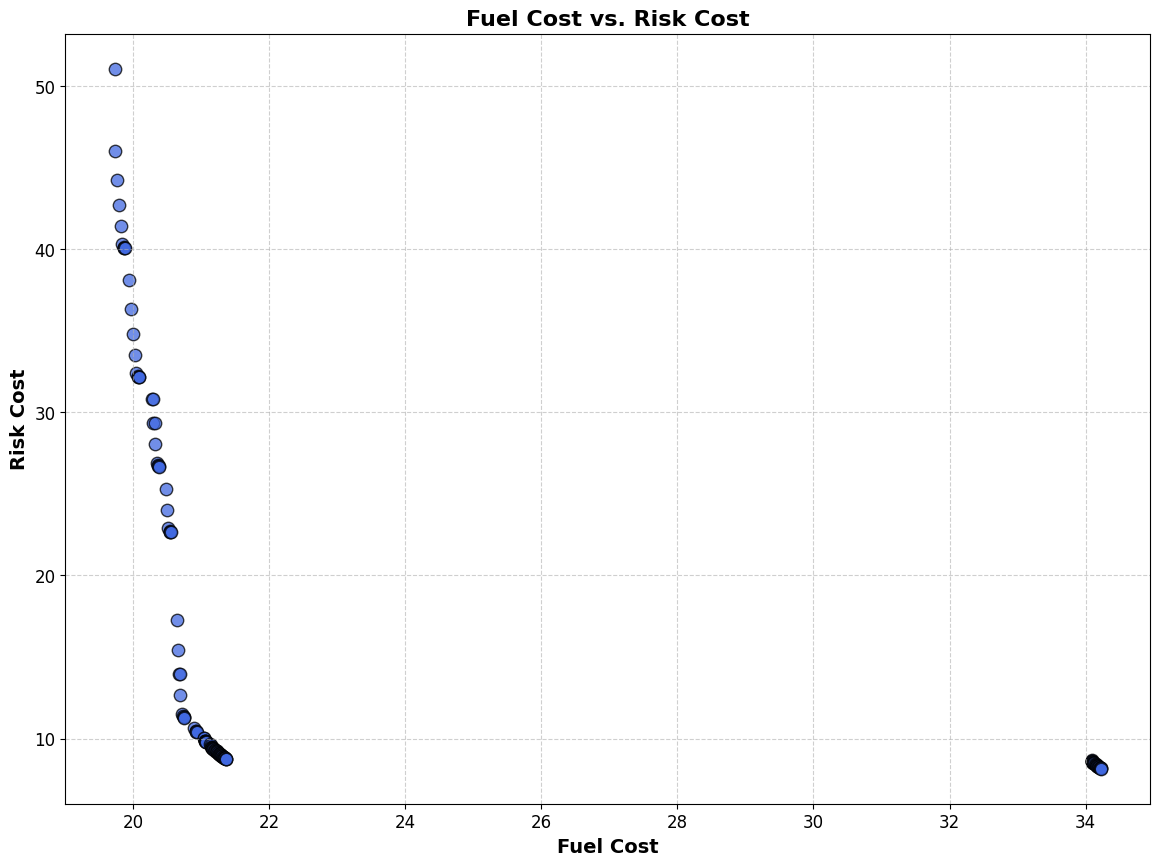

Extracted Solution Paths:
['s', 24, 11, 56, 46, 'g', (19.730019887642012, 51.0556088791319)]
['s', 24, 11, 55, 47, 'g', (19.73570374018849, 46.0060667612676)]
['s', 24, 11, 54, 47, 'g', (19.765458937976636, 44.2053512498739)]
['s', 24, 11, 54, 48, 'g', (19.789408494952706, 42.7034553852281)]
['s', 24, 11, 53, 48, 'g', (19.815483638224638, 41.4168768936494)]
['s', 24, 11, 53, 49, 'g', (19.84001405767041, 40.2859557059352)]
['s', 24, 11, 53, 50, 49, 'g', (19.861105495134463, 40.1383406384294)]
['s', 24, 11, 53, 51, 49, 'g', (19.868153855047435, 40.0903558793858)]
['s', 24, 11, 53, 52, 50, 49, 'g', (19.871691496798825, 40.0672150548325)]
['s', 24, 11, 53, 52, 51, 50, 49, 'g', (19.875229138550218, 40.0440742302791)]
['s', 23, 11, 55, 47, 'g', (19.944863789550375, 38.1013510206020)]
['s', 23, 11, 54, 47, 'g', (19.97461898733852, 36.3006355092082)]
['s', 23, 11, 54, 48, 'g', (19.998568544314587, 34.7987396445625)]
['s', 23, 11, 53, 48, 'g', (20.024643687586522, 33.5121611529838)]
['s', 23, 1

In [23]:
# =============================================================================
# Pareto Optimality Check and Plotting
# =============================================================================

# Extract cost values for the goal state
fuel_costs, risk_costs = extract_costs(sols, goal_state)

### Check Pareto optimality
### For solution to be Pareto optimal, it must be non-dominated, therefore, the list of dominated indices shoulb be epty
dominated_indices = check_pareto_optimality(fuel_costs, risk_costs)
print("Dominated solution indices:", dominated_indices)

# Plot the results
plot_costs(fuel_costs, risk_costs)

# Reconstruct and print all solution paths
solution_paths = reconstruct_solution_paths(sols, start_state, goal_state)
print("Extracted Solution Paths:")
for spath in solution_paths:
    print(spath)

KeyError: 137

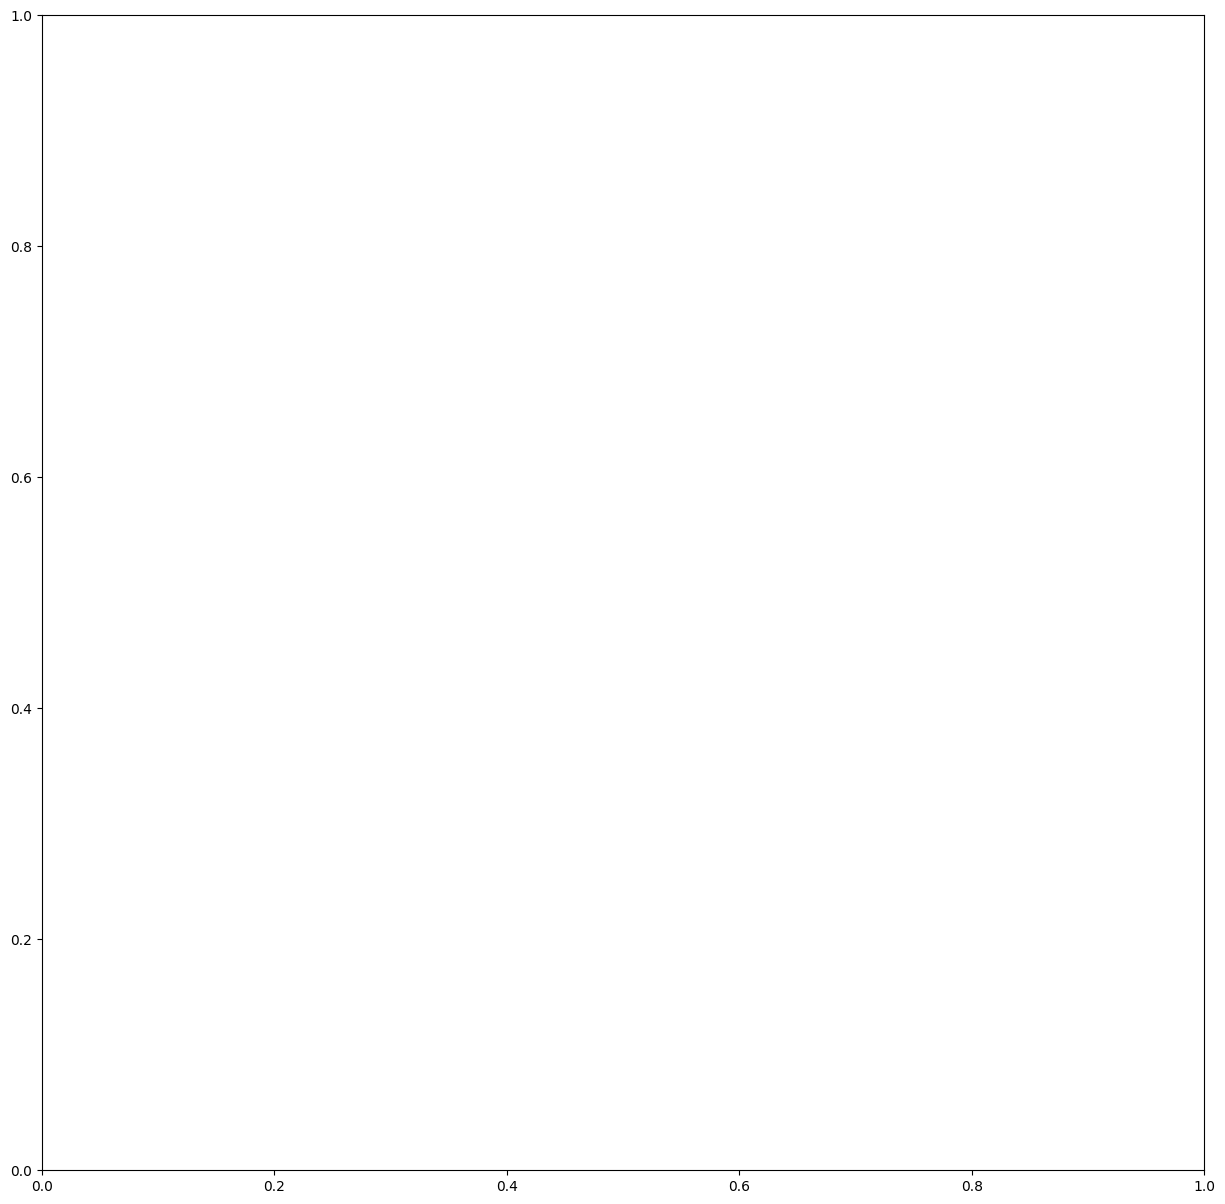

In [25]:
# =============================================================================
# Plotting the paths
# =============================================================================

### Select a single path for plotting, the tuple after "g" represents the fuel cost and the risk cost respectively
### Need to select one the path from the list of solution paths
single_path = ['s', 22, 8, 54, 53, 52, 51, 137, 114, 'g', (33.5323991747228, 79.3926033430964)]

### Selection of multiple paths for plotting evenly based on fuel cost
### Sort the paths based on the fuel cost
sorted_paths = sorted(solution_paths, key=lambda x: x[-1][0])
sampled_paths = sample_representative_paths(sorted_paths, num_path=10)

### Plot a single selected path
plot_map_with_path(graph_object, map_qz, start, goal, [single_path], reverse_index_map)

### Plot multiple sampled paths
plot_map_with_path(graph_object, map_qz, start, goal, sampled_paths[0:3], reverse_index_map)

# =============================================================================
# End of Pipeline
# =============================================================================

In [ ]:
# ##### Doing a single objective search with weigth objective
# scale_fuel_cost = 40
# scale_risk_cost = 60

# # =============================================================================
# # Graph Construction and Node Creation
# # =============================================================================

# # Instantiate the graph construction object.
# # (Assuming you have already refactored your class into GraphConstructionDiscretization.)
# graph_object = GraphConstructionDiscretization(
#     map_qz, start, goal, q_min, q_max, q_act, alpha, beta, discretization_angle, max_risk_limit, acceptable_risk_limit
# )

# start_time = time.time()
# # Create nodes and the index maps.
# nodes, index_map, reverse_index_map = graph_object.create_nodes()

# # Build the visibility graph
# graph_object.build_visibility_graph(reverse_index_map)
# end_time = time.time()

# print(f"The time req for grap construction: {end_time-start_time}")
# # Assign heuristic cost to each node
# graph_object.assign_heuristic_costs(reverse_index_map)

# def heuristic(n1,n2):
#     return graph_object.visibility_graph.nodes[n1]['heuristic_cost']

# # Run the biobjective search
# start_state = "s"
# goal_state = "g"
# path_cost_fuel_list = []
# path_cost_risk_list = []
# for factor in np.arange(0,1,0.01):
#     for edge_1, edge_2 in graph_object.visibility_graph.edges:
#         graph_object.visibility_graph[edge_1][edge_2]['weight'] = factor*graph_object.visibility_graph[edge_1][edge_2]['fuel_cost'] + (1-factor)*graph_object.visibility_graph[edge_1][edge_2]['risk_cost']

#     path = nx.astar_path(graph_object.visibility_graph, source=start_state, target=goal_state, heuristic=heuristic, weight='weight')
#     print(path)
#     path_cost_fuel = sum([graph_object.visibility_graph[path[i]][path[i+1]]['fuel_cost'] for i in range(len(path)-1)])
#     path_cost_risk = sum([graph_object.visibility_graph[path[i]][path[i+1]]['risk_cost'] for i in range(len(path)-1)])
    
#     path_cost_fuel_list.append(path_cost_fuel)
#     path_cost_risk_list.append(path_cost_risk)
#     print(f"factor: {factor}, path_cost_fuel: {path_cost_fuel}, path_cost_risk: {path_cost_risk}")

# dominated_indices = check_pareto_optimality(path_cost_fuel_list, path_cost_risk_list)

# plt.figure(figsize=(14, 10))
# plt.scatter(fuel_costs, risk_costs, color='royalblue', edgecolors='black',
#             alpha=0.75, s=80)
# plt.scatter(path_cost_fuel_list, path_cost_risk_list, color='red', marker='*')
# plt.xlabel("Fuel Cost", fontsize=14, fontweight='bold')
# plt.ylabel("Risk Cost", fontsize=14, fontweight='bold')
# plt.title("Fuel Cost vs. Risk Cost", fontsize=16, fontweight='bold')
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()